In [1]:
library(ggplot2)
library(Rmisc)
library(maditr)
library(ggthemes)
library(dplyr)

Loading required package: lattice

Loading required package: plyr


To get total summary skip 'by' argument: take_all(mtcars, mean)



Attaching package: ‘maditr’


The following object is masked from ‘package:plyr’:

    take



Attaching package: ‘dplyr’


The following objects are masked from ‘package:maditr’:

    between, coalesce, first, last


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 3.367346

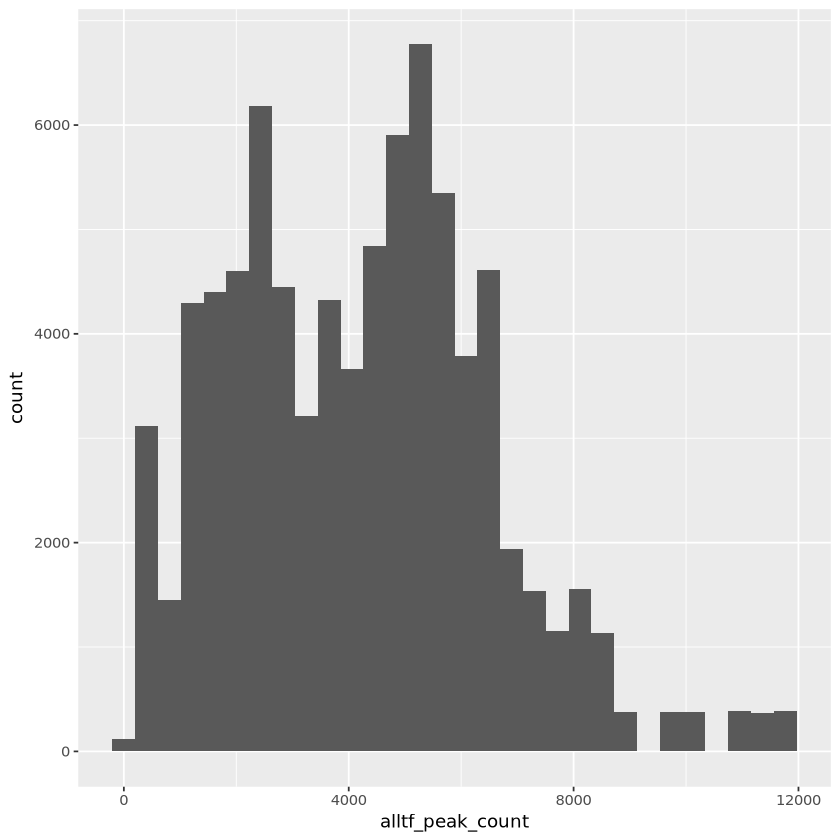

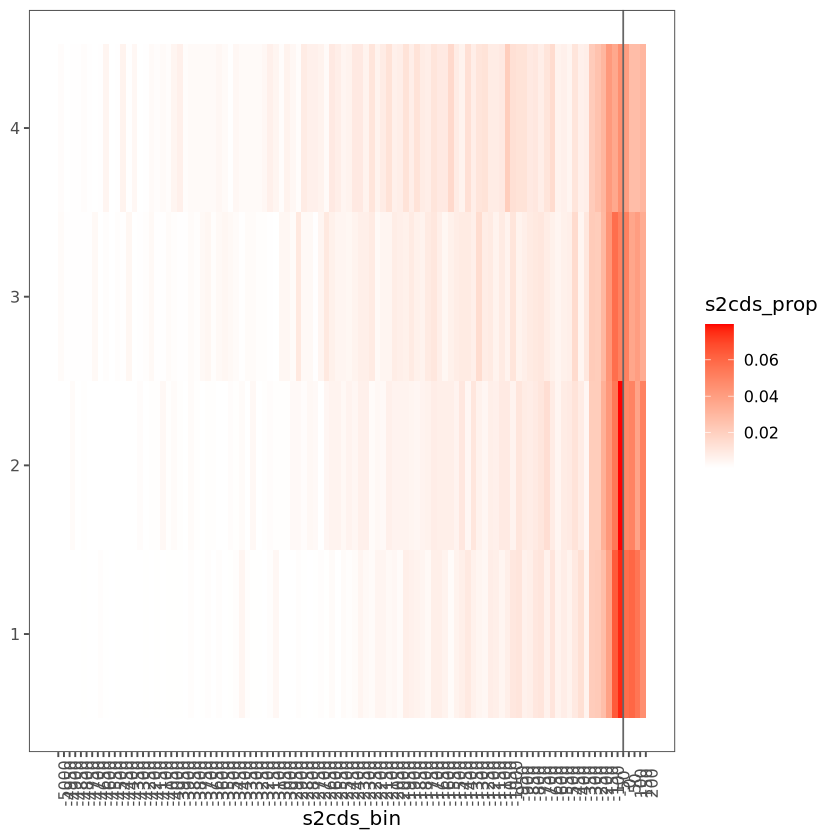

In [4]:

rm(list = ls())
setwd('/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/peak_distribution')
read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/peak_distribution/distance_TTS_bin_prop_by_tf_cons.tsv", header=T) -> tab

read.csv('/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/ath-258-tf-info_simple.csv', header=T) -> tf_info

merge(tab,tf_info, by.x="tf", by.y="gene_id") -> tab_lab

ggplot(tab_lab, aes(x=alltf_peak_count)) + geom_histogram() 

#subset(tab, allfam_peak_count > 1000) -> tab_filt

#Example
subset(tab_lab, tf_name == "DAG2") -> eg

sum(eg$s2cds_prop)

ggplot(eg, aes(x=s2cds_bin, y=n_cons_species_minfrac0)) +
  geom_tile(aes(fill = s2cds_prop)) +
  theme_few() + 
  scale_fill_gradient(low = "white", high = "red") + 
#  guides(fill="none") +
  ylab(NULL) + 
  theme(axis.text.x = element_text(angle = 90)) +
  scale_x_continuous(breaks=seq(-5000, 200, 50)) + 
  geom_vline(xintercept = 0, color="gray40")


In [4]:
head(tab_lab)

,tf,s2cds_bin,n_cons_species_minfrac0,s2cds_peak_bin_count,tf_by_cons_peak_count,alltf_peak_count,s2cds_prop,tf_pcount,tf_family,tf_name,tf_and_fam,representative_category,tf_clade_curated,clade
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,AT1G01060,-4975,1,11,1075,2996,0.0102325581,AT1G01060_2996,MYBRELATED,LHY,MYBRELATED_LHY,1,3,MYBRELATED_c3
2,AT1G01060,-4975,2,27,1042,2996,0.0259117083,AT1G01060_2996,MYBRELATED,LHY,MYBRELATED_LHY,1,3,MYBRELATED_c3
3,AT1G01060,-4975,3,27,624,2996,0.0432692308,AT1G01060_2996,MYBRELATED,LHY,MYBRELATED_LHY,1,3,MYBRELATED_c3
4,AT1G01060,-4975,4,16,255,2996,0.0627450980,AT1G01060_2996,MYBRELATED,LHY,MYBRELATED_LHY,1,3,MYBRELATED_c3
5,AT1G01060,-4925,2,1,1042,2996,0.0009596929,AT1G01060_2996,MYBRELATED,LHY,MYBRELATED_LHY,1,3,MYBRELATED_c3
6,AT1G01060,-4925,3,2,624,2996,0.0032051282,AT1G01060_2996,MYBRELATED,LHY,MYBRELATED_LHY,1,3,MYBRELATED_c3


In [5]:
tab_lab %>%
    select(tf_name) %>%
    unique() %>%
    write.table(file = "/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/tf_name_list.txt",row.names=F,quote = F)

In [7]:
# Reading TF list to plot
tf_list <- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/tf_name_list.txt",header = T,stringsAsFactors = F) %>%
  pull(tf_name)

setwd("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/tf_TTS_5200region_100bin_each_region_distribution_heatmap")
for (TF in tf_list){
  print(TF)
  fam_var <- tab_lab %>% filter(tf_name == TF)
  
  print( length(unique(fam_var$alltf_peak_count)))
  
  ggplot(fam_var, aes(x=s2cds_bin, y=n_cons_species_minfrac0)) +
    geom_tile(aes(fill = s2cds_prop)) +
    theme_few() + 
    scale_fill_gradient(low = "white", high = "red") + 
    ylab(NULL) + 
    theme(axis.text.x = element_text(angle = 90)) +
    scale_x_continuous(breaks=seq(-5000, 200, 400)) + 
    geom_vline(xintercept = 0, color="gray40") +
    ggtitle(TF) -> plot
  
  filename <- file.path(paste0(TF, "_heatmap_S2CDS_norm_by_cons.pdf"))
  pdf(width = 10, height = 1.8, filename)
  print(plot)
  dev.off()
}

[1] "LHY"
[1] 1


[1] "AT1G01250"
[1] 1
[1] "ATAF1"
[1] 1
[1] "NAC004"
[1] 1
[1] "NAC005"
[1] 1
[1] "ERF10"
[1] 1
[1] "LBD2"
[1] 1
[1] "bZIP52"
[1] 1
[1] "TGA9"
[1] 1
[1] "MYB61"
[1] 1
[1] "NAC007"
[1] 1
[1] "DDF1"
[1] 1
[1] "AT1G12630"
[1] 1
[1] "BZIP58"
[1] 1
[1] "HB32"
[1] 1
[1] "MYB58"
[1] 1
[1] "EPR1"
[1] 1
[1] "AT1G19000"
[1] 1
[1] "ERF17"
[1] 1
[1] "ARID3"
[1] 1
[1] "SPL14"
[1] 1
[1] "TGA3"
[1] 1
[1] "ERF19"
[1] 1
[1] "MYB116"
[1] 1
[1] "NIGT1.1"
[1] 1
[1] "STZ"
[1] 1
[1] "AT1G28160"
[1] 1
[1] "ERF11"
[1] 1
[1] "NAC010"
[1] 1
[1] "COG1"
[1] 1
[1] "WRKY65"
[1] 1
[1] "TCP24"
[1] 1
[1] "BZIP68"
[1] 1
[1] "GTL1"
[1] 1
[1] "MYB93"
[1] 1
[1] "ERF55"
[1] 1
[1] "VIP1"
[1] 1
[1] "RAP2.1"
[1] 1
[1] "AT1G47655"
[1] 1
[1] "MYBS1"
[1] 1
[1] "RTV1"
[1] 1
[1] "ERF3"
[1] 1
[1] "WIP5"
[1] 1
[1] "NAM"
[1] 1
[1] "ERF8"
[1] 1
[1] "TCP3"
[1] 1
[1] "DDF2"
[1] 1
[1] "DOF1.8"
[1] 1
[1] "MYB62"
[1] 1
[1] "CRC"
[1] 1
[1] "NAP"
[1] 1
[1] "CDF5"
[1] 1
[1] "TCP15"
[1] 1
[1] "HB13"
[1] 1
[1] "FUF1"
[1] 1
[1] "TCP22"
[1] 1
[1]